# 论文是如何被引用的？

每一篇论文后面通常都会有参考文献，这些参考文献是如何被引用的呢？是（在同一领域论文中）被随机选中的吗？还是说存在着某种隐含模式，比如说马太效应（“穷则越穷，富则越富”）？

In [2]:
# 从网页链接导入数据（由于数据存储在谷歌服务器，需科学上网，无法科学上网的小伙伴请下载文件数据并从本地导入）

import urllib2

# Code for loading citation graph

CITATION_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"

def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

#citation_graph = load_graph(CITATION_URL)

In [10]:
# 从文本文件中导入数据，并存储成以字典表示的有向图（ directed graph）
def load_graph(graph_file_path):
    """
    从文本文件中导入数据（以文本表示的图）
    返回存以字典表示的有向图（ directed graph）
    """
    answer_graph = {}
    
    with open(graph_file_path) as data:
        for line in data.xreadlines():
            neighbors = line.split(' ')
            node = int(neighbors[0])
            answer_graph[node] = set([])
            for neighbor in neighbors[1 : -1]:
                answer_graph[node].add(int(neighbor)) 
    print "Loaded graph with", len(answer_graph), "nodes"
    return answer_graph

citation_graph = load_graph('e:\\python programs\\citation graph data.txt')

Loaded graph with 27770 nodes


In [75]:
# 计算citation graph的in-degree distribution，并把数据标准化

# 先定义一个辅助函数来计算有向图的in-degree
def compute_in_degrees(digraph):
    """
    Takes a directed graph digraph (represented as a dictionary) 
    and computes the in-degrees for the nodes in the graph
    returns a dictionary
    """
    # initialize the in_degrees dictionary
    in_degrees_dic = {}
    for node in digraph:
        in_degrees_dic[node] = 0
    # compute the indegrees of all nodes
    for node in digraph:
        adjacent_nodes = digraph[node]
        for adj_node in adjacent_nodes:
            in_degrees_dic[adj_node] += 1
    return in_degrees_dic

# 再定义函数来计算有向图的in-degree distribution（normalized）
def in_degree_distribution(digraph):
    """
    Takes a directed graph digraph (represented as a dictionary) 
    and computes the normalized distribution of the in-degrees of the graph
    returns a dictionary 
    """
    in_degrees_dic = compute_in_degrees(digraph)
    distribution_dic = {}
    num_nodes = float(len(digraph))
    for node in in_degrees_dic:
        in_degree = in_degrees_dic[node]
        if distribution_dic.has_key(in_degree):
            distribution_dic[in_degree] += (1.0/num_nodes)
        else:
            distribution_dic[in_degree] = (1.0/num_nodes)
    return distribution_dic

citation_distribution = in_degree_distribution(citation_graph)

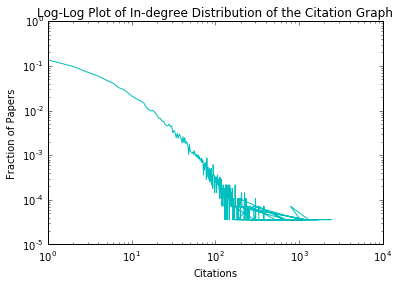

In [76]:
# 算好了in-degree distribution，画个图可视化一下

import matplotlib.pyplot as plt
%matplotlib inline

xdata = citation_distribution.keys()
ydata = citation_distribution.values()
plt.loglog(xdata, ydata,'c')
plt.title("Log-Log Plot of In-degree Distribution of the Citation Graph")
plt.xlabel("Citations")
plt.ylabel("Fraction of Papers")

根据上面的citation graph的in-degree分布图，我们可以看到，论文被引用次数少的占比较大，随着论文被引用次数增长，论文所占的比例是越来越低的，有点类似长尾分布。但是看了这个图还是没什么感觉，我们找个随机引用模式下的图来对比看看。

In [77]:
# 生成随机有向图

import random

def random_digragh(n, p):
    """
    Functions that generate random directed graphs with n nodes
    with edge (i,j) in probability p
    
    Returns a directd graph in dictionary representation
    """
    nodes = range(n)
    # initialize the result_graph
    result_graph = {}
    for node in nodes:
        result_graph[node] = set([])
    # generate edges
    for node in nodes:
        rest_nodes = set(nodes) - set([node])
        for other_node in rest_nodes:
            # generate a random number in [0,1)
            ran = random.random()
            if ran < p:
                # add j to the adjacent nodes
                result_graph[node].add(other_node)
    return result_graph

# test       
# print random_digragh(2,1)
# print random_digragh(4,0)

In [78]:
# generate some random directed graphs with len(citation_graph) nodes
# NODES = len(citation_graph) that's too large...
NODES = 100
r_digraph0 = random_digragh(NODES, 0.25)
r_digraph1 = random_digragh(NODES, 0.5)
r_digraph2 = random_digragh(NODES, 0.75)

# compute the in-degrees distributions of the above graph
r_digraph0_distribution = in_degree_distribution(r_digraph0)
r_digraph1_distribution = in_degree_distribution(r_digraph1)
r_digraph2_distribution = in_degree_distribution(r_digraph2)

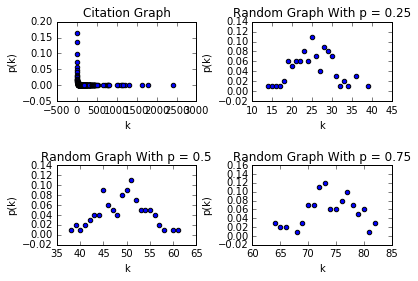

In [79]:
# plot the citation and the three random graphs's in-degrees distribution graph in log/log scale
import matplotlib.pyplot as plt
%matplotlib inline

# 整张图的标题
fig = plt.figure('Log-log In-degrees Distributions of Citation Graph & 3 Random Graphs ')
# 在整张图上加入一个子图，2，2，1的意思是在一个2行2列的子图中的第一张
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Citation Graph')
plt.scatter(citation_distribution.keys(), citation_distribution.values())
plt.xlabel("k")
plt.ylabel("p(k)")

# 第2张
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Random Graph With p = 0.25')
plt.scatter(r_digraph0_distribution.keys(), r_digraph0_distribution.values())
#plt.xlim([0,max(r_digraph0_distribution.keys())])
plt.xlabel("k")
plt.ylabel("p(k)")

# 第3张
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Random Graph With p = 0.5')
plt.scatter(r_digraph1_distribution.keys(), r_digraph1_distribution.values())
#plt.xlim([0,max(r_digraph1_distribution.keys())])
plt.xlabel("k")
plt.ylabel("p(k)")

# 第4张
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Random Graph With p = 0.75')
plt.scatter(r_digraph2_distribution.keys(), r_digraph2_distribution.values())
#plt.xlim([0,max(r_digraph2_distribution.keys())])
plt.xlabel("k")
plt.ylabel("p(k)")

# 调整subplot周围的距离
# wspace,the amount of width reserved for blank space between subplots,expressed as a fraction of the average axis width
# hspace,he amount of height reserved for white space between subplots,expressed as a fraction of the average axis height
fig.subplots_adjust(wspace = 0.4, hspace = 0.8)

对比我们的citation graph 跟 random graph的in-degree distribution,可以很明显得看到差别，citation graph的in-degree distribution散点图看起来是一条长尾，而random graph的in-degree distribution散点图看起来是个钟形图，很显然，论文引用的模式并不是随机的。我们再来看看另一种模式，这里需要设计一个算法来生成类似马太效应的graph，这里用了DPA算法，思路就是那些in-degree越大的节点被选中作为新节点的neighbor的概率越大，进而又使得它的in-degree更大。

In [80]:
# DPA Algorithm

# choose values for n and m that yield a DPA graph 
# whose number of nodes and edges is roughly the same to those of the citation graph

# helper function
def compute_avg_outdegree(digraph):
    """
    return average out-degree(integer) of the input graph
    """
    nodes = 0
    total_outdegree = 0
    for node in digraph:
        nodes += 1
        total_outdegree += len(digraph[node])
    return total_outdegree / nodes


# let n be the number of nodes in the citation graph
dpa_n = len(citation_graph)

# let m be an integer close to the average out-degree of the citation graph
dpa_m = compute_avg_outdegree(citation_graph)

print dpa_n, dpa_m

27770 12


In [81]:
"""
Helper class for implementing efficient version
of DPA algorithm
"""
class DPATrial:
    """
    Simple class to encapsulate optimized trials for DPA algorithm
    
    Maintains a list of node numbers with multiple instances of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    """
    def __init__(self, num_nodes):
        """
        Initialize a DPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_node trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that the number of instances of
        each node number is in the same ratio as the desired probabilities
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

In [82]:
# helper function to generate complete graph
def make_complete_graph(num_nodes):
    """
    Takes the number of nodes num_nodes and
    return complete directed graph in dictionary representation
    """
    nodes_set = range(num_nodes)
    graph_dic = {}
    for node in nodes_set:
        adjacent_nodes = set(nodes_set) - set([node])
        graph_dic[node] = adjacent_nodes
    return graph_dic


# implement DPA algorithm
def dpa_graph(n, m):
    """
    given num_nodes n and interger m
    generate a dpa graph
    and return it
    """
    # start from a complete graph of m nodes
    num_nodes = m
    graph = make_complete_graph(m)
    # create a DPATrial object to encapsulate optimized trials for DPA algorithm
    dpa_trial = DPATrial(num_nodes)
    
    for new_node in range(m, n):
        new_node_neighbors = dpa_trial.run_trial(num_nodes)
        # update graph
        graph[new_node] = new_node_neighbors
    
    return graph  

In [83]:
# compute a DPA graph with the same number of nodes of the citation graph
dpa_graph1 = dpa_graph(dpa_n, dpa_m)

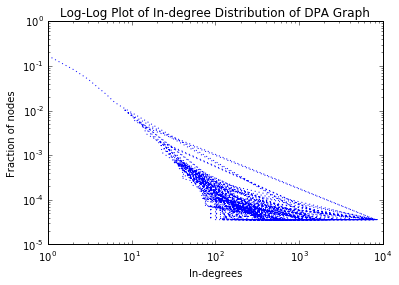

In [84]:
# compute a log/log plot of the points in the dpa graph's in-degree distribution
# compute in-degree distribution of dpa_graph1
dpa_graph1_distribution = in_degree_distribution(dpa_graph1)

xdata1 = dpa_graph1_distribution.keys()
ydata1 = dpa_graph1_distribution.values()
plt.loglog(xdata1, ydata1, basex = 10, basey = 10, linestyle = "dotted")
plt.title("Log-Log Plot of In-degree Distribution of DPA Graph")
plt.xlabel("In-degrees")
plt.ylabel("Fraction of nodes")

DPA graph的in-degree distribution plot看起来跟citation graph的in-degree distribution plot比较类似，都是随着论文被引用次数增长，论文数量占比下降。也就是说被引用次数很多的论文占的是少数，大部分论文都是被引用很少次的。这跟我们的认知是很相似的。

**那么为什么是这样一种模式呢？**

从DPA算法的设计中我们得到一些灵感，那些被引用次数越多的论文，其曝光次数越多，被越多的人看到，然后这些人又引用了这些论文，就像滚雪球一样，越滚越大。而那些默默无闻的论文，由于曝光次数太少，就渐渐沉了，更加不会被引用了。

其实这个模式还是很显而易见的啦。